## Visualize subintervals concepts

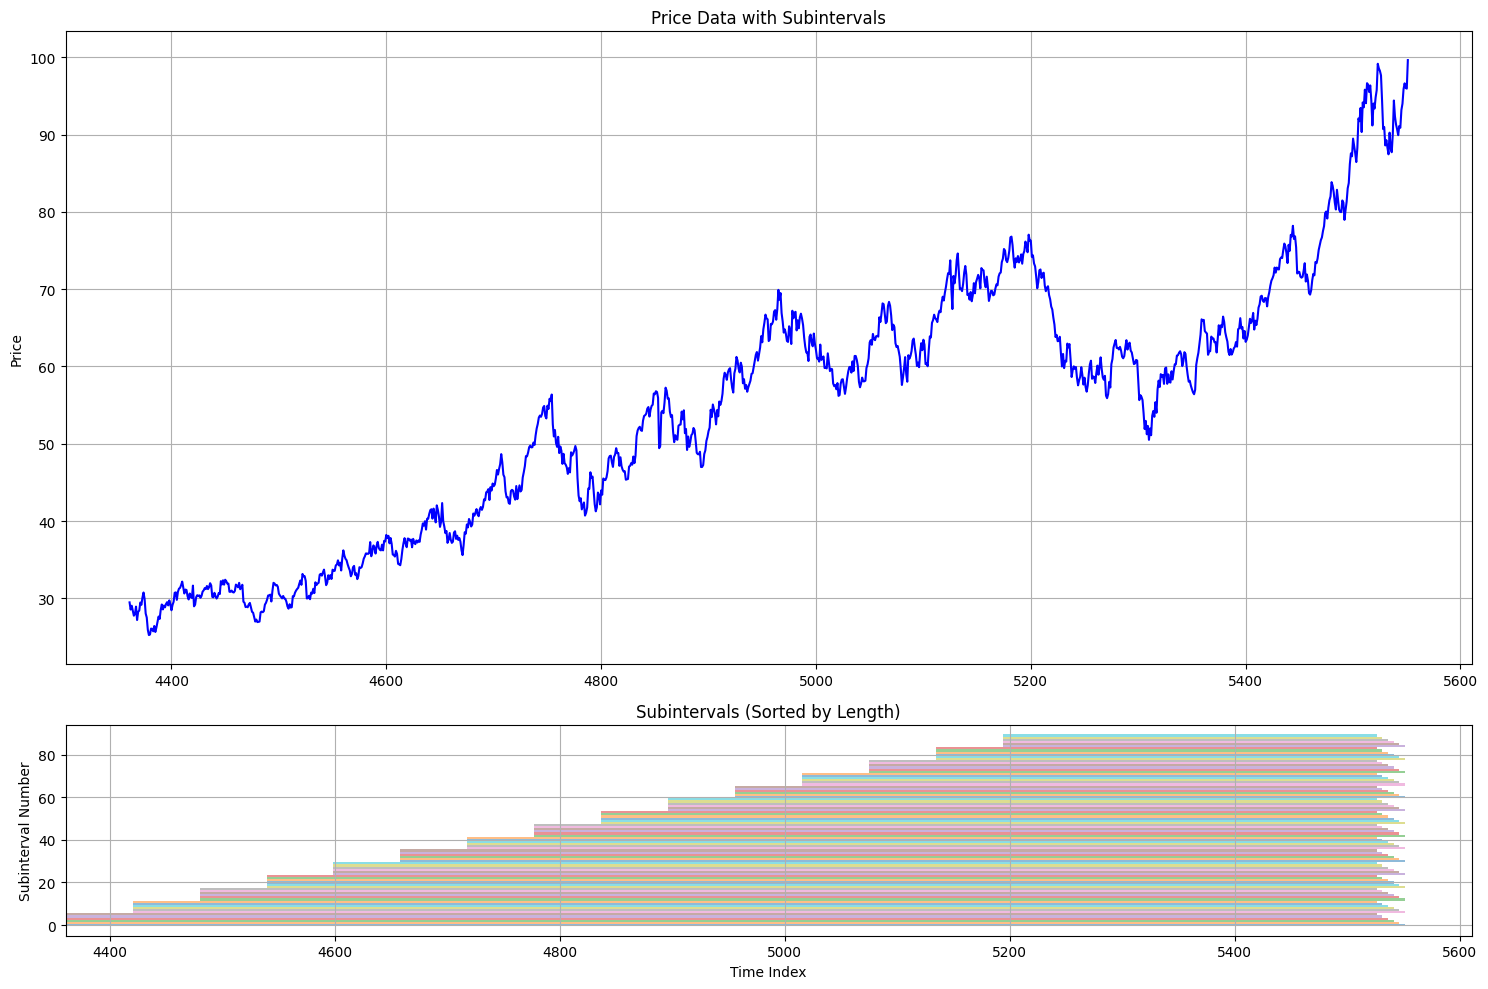

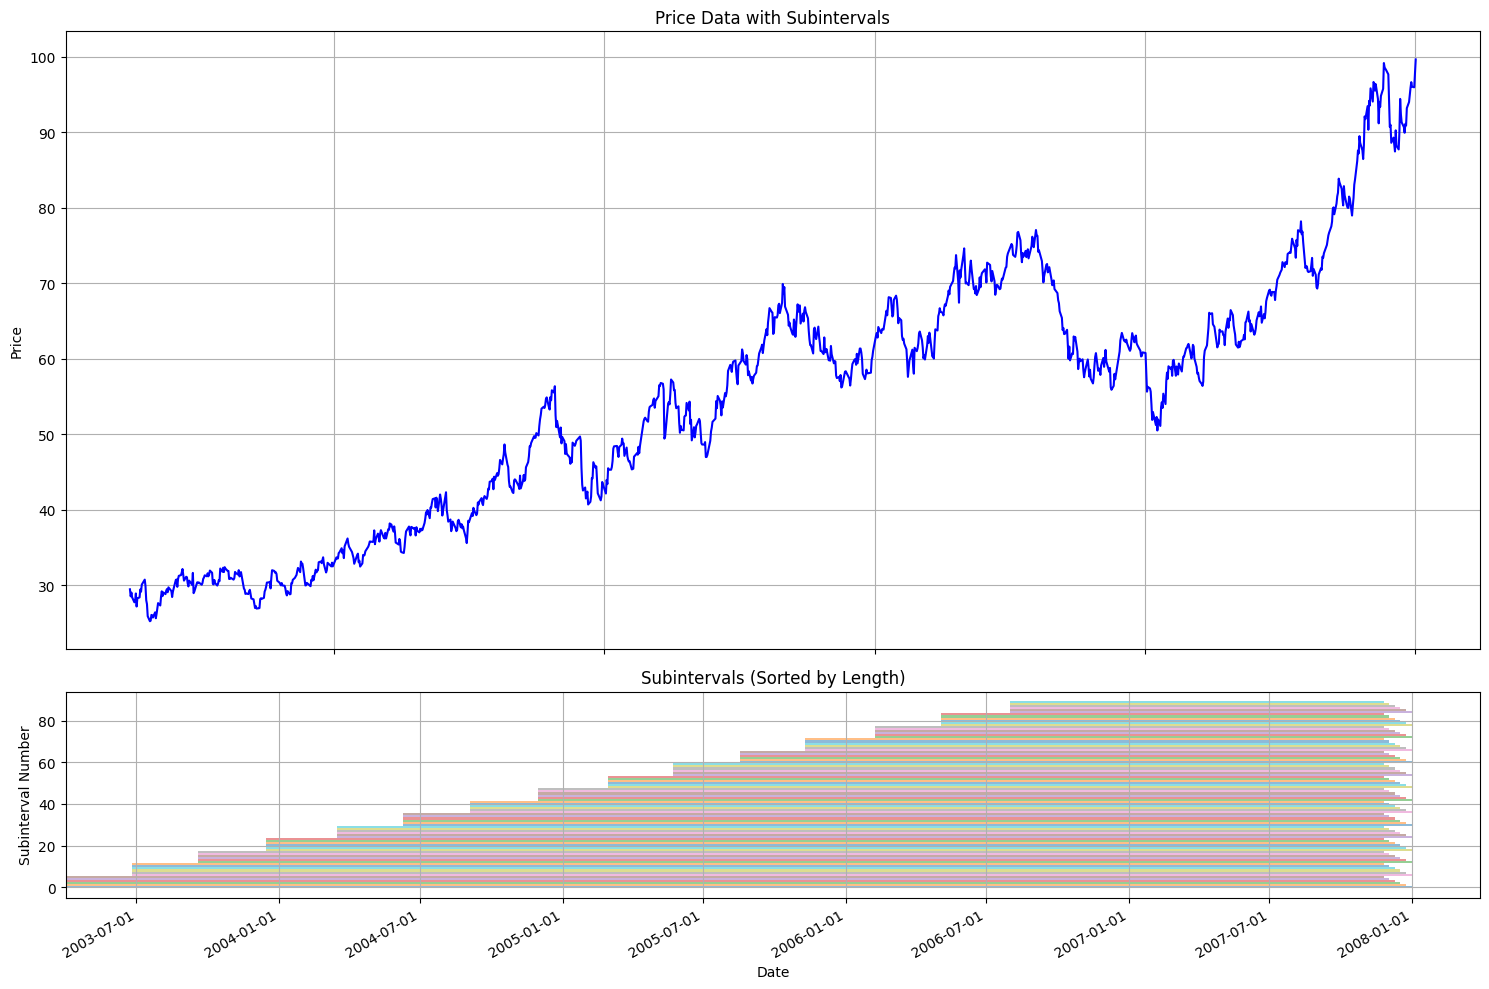

In [4]:

from GQLib.Optimizers import MPGA, PSO, SGA, SA, NELDER_MEAD, TABU, FA
from GQLib.Models import LPPL, LPPLS
from GQLib.enums import InputType
from GQLib.AssetProcessor import AssetProcessor
from GQLib.logging import configure_logger
from GQLib.Framework import Framework
import numpy as np

configure_logger("INFO")

fw = Framework("daily", InputType.WTI) 
sample = fw.select_sample(fw.data, "01/04/2003", "02/01/2008") 
subintervals = fw.generate_subintervals(fw.frequency, sample)

import matplotlib.pyplot as plt
# Create figure and axis#
# Create figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), height_ratios=[3, 1])

#
ax1.plot(sample[:, 0], sample[:, 1], 'b-', label='Price')
ax1.set_title('Price Data with Subintervals')
ax1.set_ylabel('Price')
ax1.grid(True)

# Sort subintervals by length (longest first)
sorted_subintervals = sorted(enumerate(subintervals), 
                           key=lambda x: x[1][1] - x[1][0], 
                           reverse=True)

# Plot subintervals as stacked bars in the lower subplot
for i, (orig_idx, (start, end, _)) in enumerate(sorted_subintervals):
    ax2.barh(y=i, width=end-start, left=start, height=1, alpha=0.5, 
             label=f'Original interval {orig_idx+1}')

ax2.set_title('Subintervals (Sorted by Length)')
ax2.set_xlabel('Time Index')
ax2.set_ylabel('Subinterval Number')
ax2.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

def plot_with_dates(subintervals, sample, fw_data):
    # Step 1: Create index-to-date mapping
    index_to_date = dict(zip(fw_data[:, 0].astype(int), pd.to_datetime(fw_data[:, 1])))

    # Convert x-values in sample from index to date
    sample_dates = np.array([index_to_date[int(idx)] for idx in sample[:, 0]])

    # Create figure and axis
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), height_ratios=[3, 1])

    # Plot sample prices with datetime x-axis
    ax1.plot(sample_dates, sample[:, 1], 'b-', label='Price')
    ax1.set_title('Price Data with Subintervals')
    ax1.set_ylabel('Price')
    ax1.grid(True)

    # Step 2: Sort subintervals by length
    sorted_subintervals = sorted(enumerate(subintervals), 
                                 key=lambda x: x[1][1] - x[1][0], 
                                 reverse=True)

    # Step 3: Plot bars with datetime on x-axis
    for i, (orig_idx, (start, end, _)) in enumerate(sorted_subintervals):
        start_date = index_to_date[int(start)]
        end_date = index_to_date[int(end)]
        duration = (end_date - start_date).days or 1  # fallback if same day
        ax2.barh(y=i, width=duration, left=start_date, height=1, alpha=0.5,
                 label=f'Interval {orig_idx+1}')

    ax2.set_title('Subintervals (Sorted by Length)')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Subinterval Number')
    ax2.grid(True)

    # Format x-axis as dates
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()

    # Adjust layout
    plt.tight_layout()
    plt.show()


plot_with_dates(subintervals, sample, fw.data)

In [17]:
fw.data

array([[0.0, Timestamp('1986-01-02 00:00:00'), 25.56],
       [1.0, Timestamp('1986-01-03 00:00:00'), 26.0],
       [2.0, Timestamp('1986-01-06 00:00:00'), 26.53],
       ...,
       [9803.0, Timestamp('2024-12-05 00:00:00'), 68.58],
       [9804.0, Timestamp('2024-12-06 00:00:00'), 68.58],
       [9805.0, Timestamp('2024-12-09 00:00:00'), 68.65]],
      shape=(9806, 3), dtype=object)

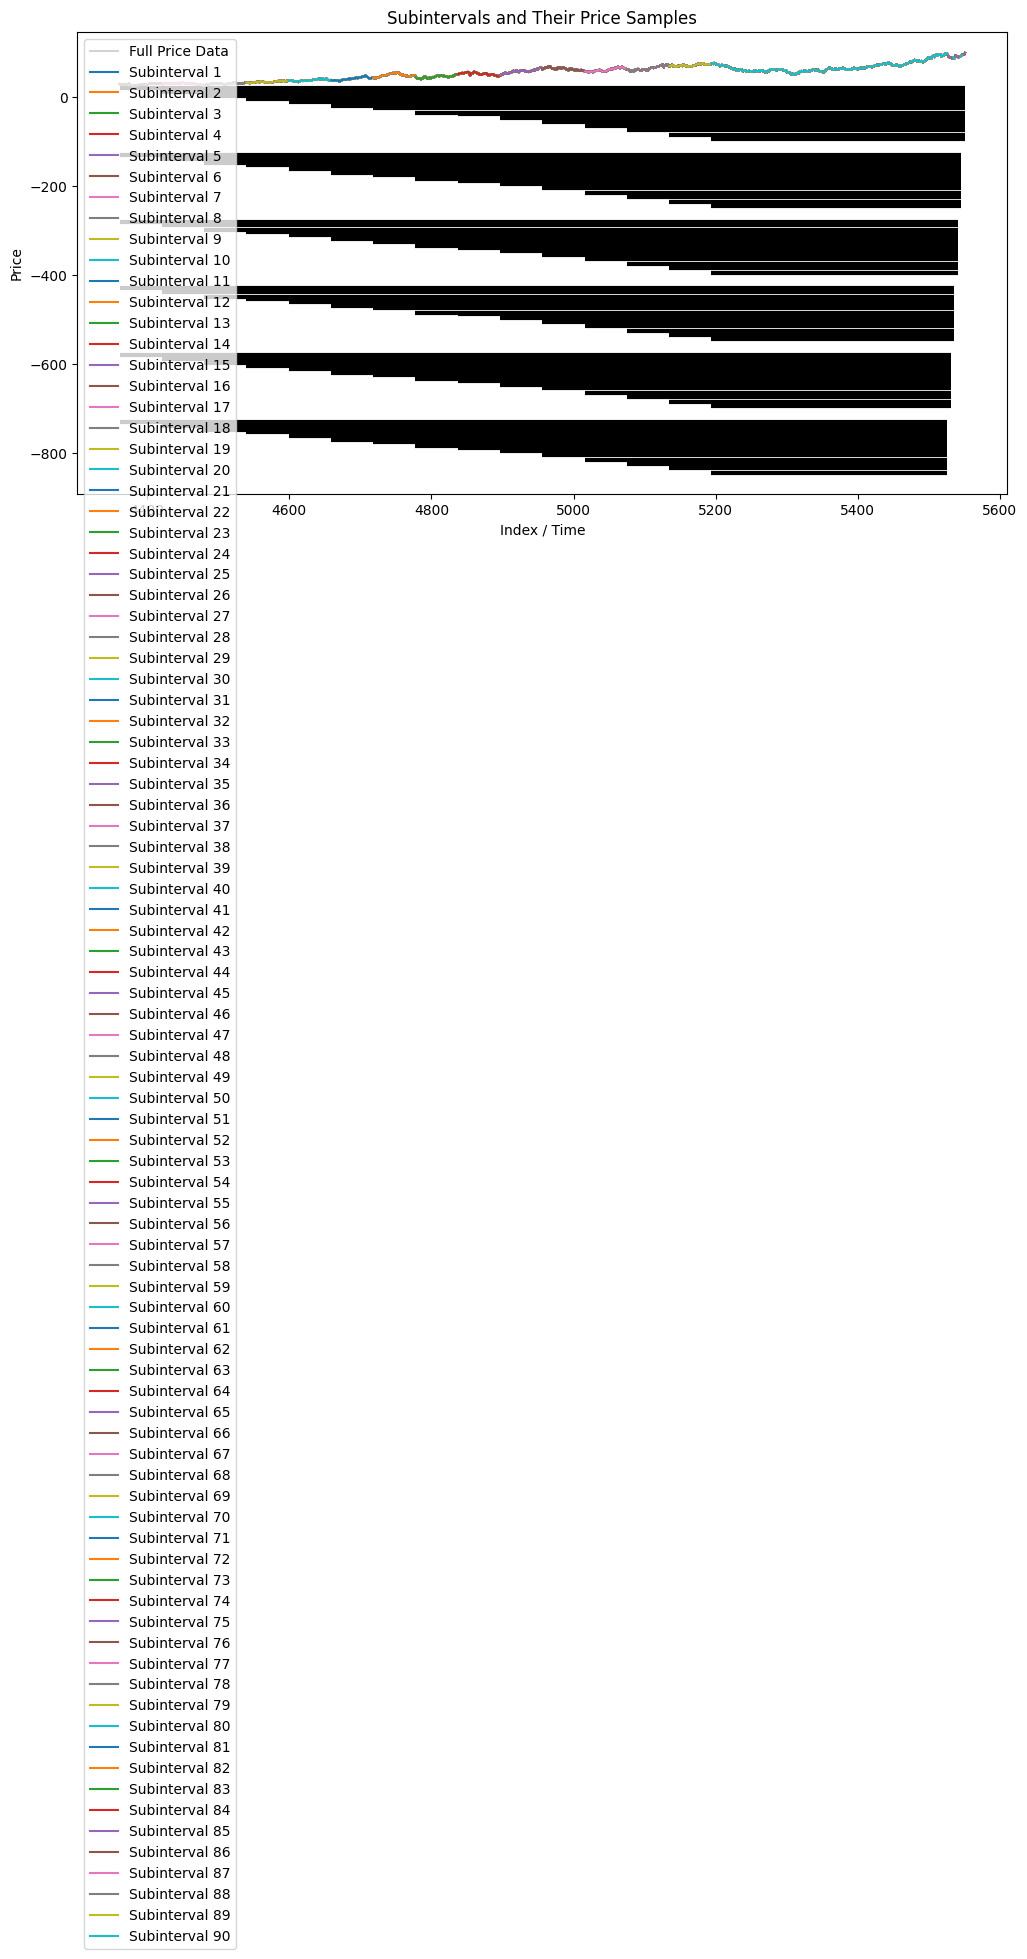

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple, Optional

def plot_subintervals(subintervals: List[Tuple[int, int, np.ndarray]],
                      price_data: Optional[np.ndarray] = None):
    """
    Plots the price data and visualizes subintervals as stacked bars.
    
    Parameters:
    - subintervals: List of tuples (start, end, np.array[[index, price]])
    - price_data: Optional np.array[[index, price]] for full price series
    """
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot full price data in background
    if price_data is not None:
        ax.plot(price_data[:, 0], price_data[:, 1], color='lightgray', label='Full Price Data', zorder=0)

    # Plot each subinterval as a horizontal line (stacked vertically)
    for i, (start, end, data) in enumerate(subintervals):
        x = data[:, 0]
        y = data[:, 1]
        
        # Plot sampled price for the subinterval
        ax.plot(x, y, label=f'Subinterval {i+1}', lw=1.5)
        
        # Add interval bar
        ax.hlines(y=min(y)-5 - i*10, xmin=start, xmax=end, colors='black', lw=3)

    ax.set_title("Subintervals and Their Price Samples")
    ax.set_xlabel("Index / Time")
    ax.set_ylabel("Price")
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_subintervals(subintervals, sample)

In [1]:
from GQLib.Optimizers import MPGA, PSO, SGA, SA, NELDER_MEAD, TABU, FA
from GQLib.Models import LPPL, LPPLS
from GQLib.enums import InputType
from GQLib.AssetProcessor import AssetProcessor
from GQLib.logging import configure_logger

configure_logger("DEBUG")

wti = AssetProcessor(input_type = InputType.WTI)

wti.compare_optimizers(frequency = "daily",
                        optimizers =  [NELDER_MEAD(LPPLS)],
                        significativity_tc=0.3,
                        rerun = False,
                        nb_tc = 10,
                        save=False,
                        save_plot=False)

[05/18/25 22:57:13] INFO     Input type: InputType.WTI

                    INFO     Running process for Set 1 from 01/04/2003 to 02/01/2008

                    INFO                                                                                           
                             Running process for NELDER_MEAD

{'tc_distrib': [5547.682998915445, 5553.166296096377, 5567.7650538021635, 5571.43965275713, 5574.015785019867, 5575.1173266097285, 5578.016274677509, 5580.806353283874, 5582.669105507082, 5583.7833684490615, 5583.9905910957405, 5591.097100017184, 5594.634099911409, 5595.248940701601, 5600.379525675753, 5605.252552005143, 5605.544702913089, 5612.388333808402, 5613.826694423923, 5622.8194238848355, 5623.621588176818, 5624.455368773932, 5627.083587457445, 5629.8947540285135, 5635.033343959452, 5635.927843801934, 5641.868637971241, 5641.945896557113, 5645.394117200614, 5647.538298199079, 5650.778039275828, 5653.915608472298, 5655.593328931669, 5656.572612348881, 5662.378068838692, 5664.770494321815, 5664.892049636092, 5668.458974769205, 5671.3329097349715, 5671.933565164322, 5675.7566185899195, 5676.037634234682, 5676.809336757504, 5679.053832685844, 5679.9097909411785, 5679.942811036676, 5685.671197538422, 5694.864624929867, 5697.832057035515, 5703.874065642921, 5718.856927916882, 5718.98

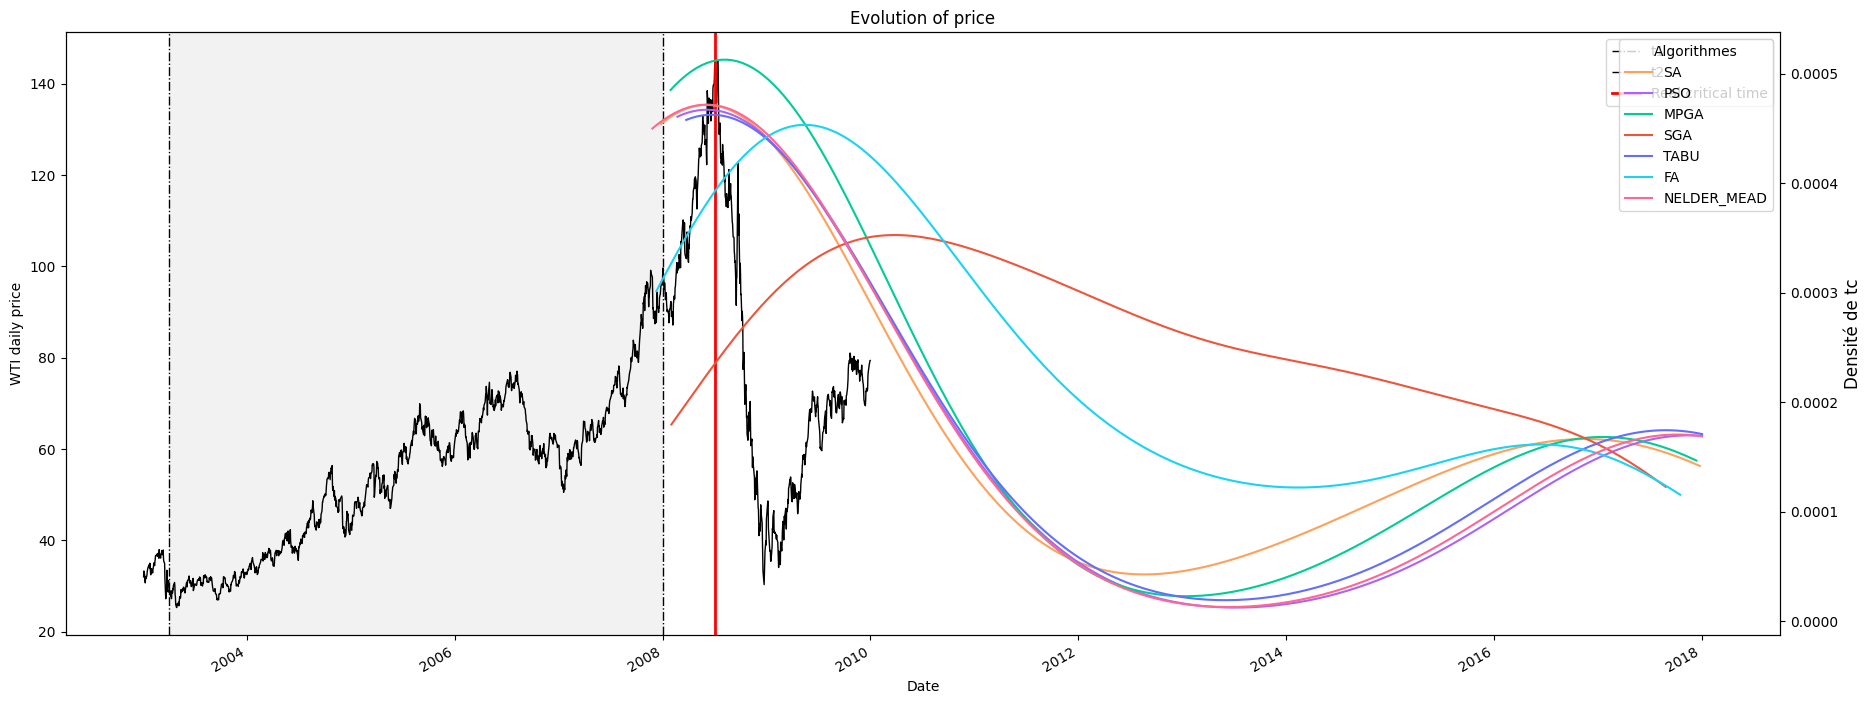

In [1]:
from GQLib.Framework import Framework
from GQLib.enums import InputType
import json

fw = Framework("daily", InputType.WTI)

fig, axes = fw._base("01/04/2003", "02/01/2008", "03/07/2008")

with open("Venise_Results/WTI_metrics.json", "r") as f:
    data = json.load(f)

fw._add_kernels(fig, axes, data["Set 1"])



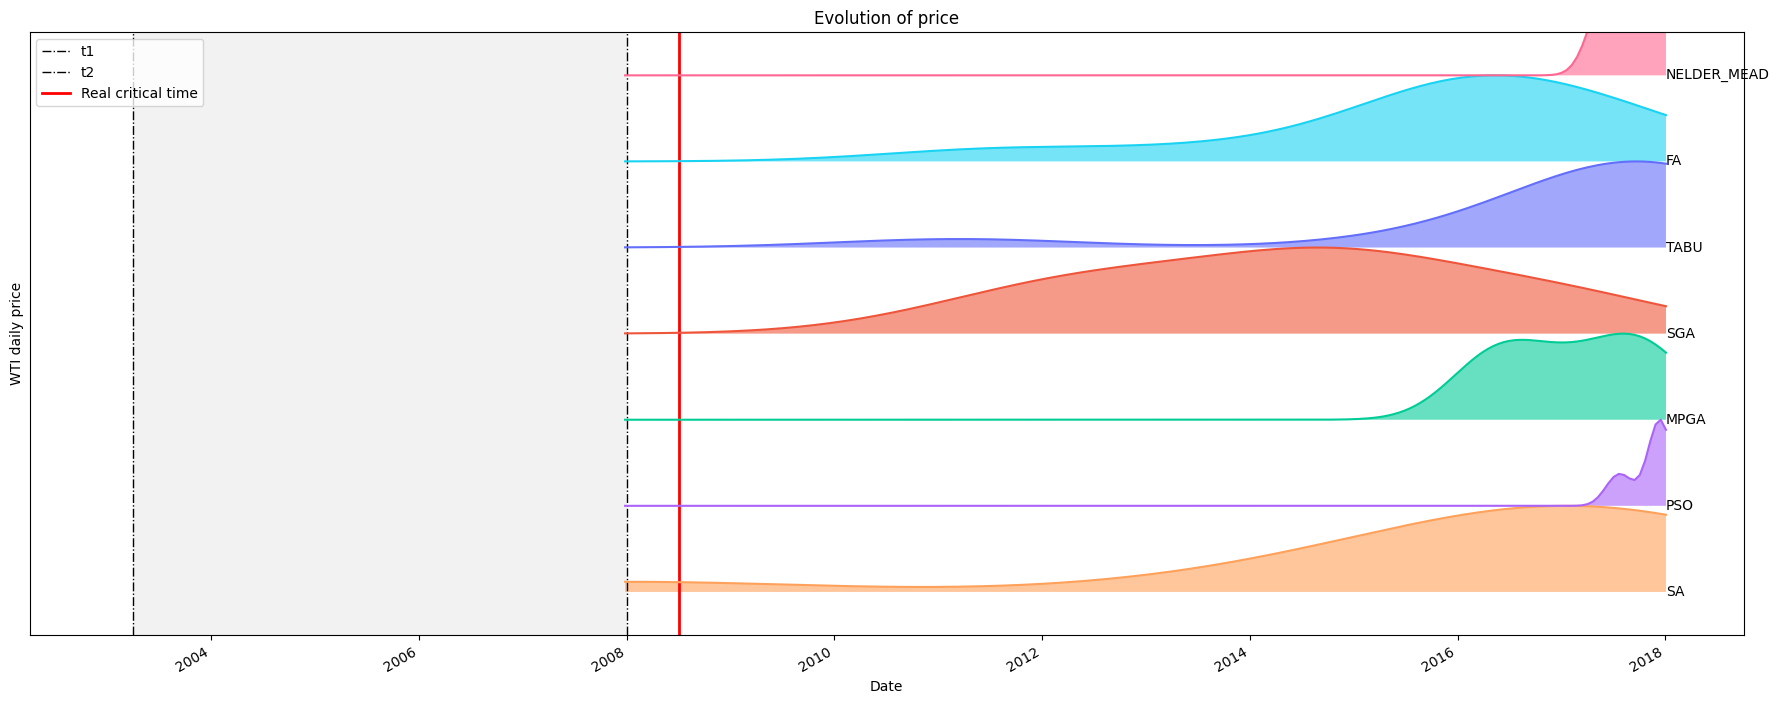

In [2]:
from GQLib.Framework import Framework
from GQLib.enums import InputType
import json

fw = Framework("daily", InputType.WTI)

fig, axes = fw._base("01/04/2003", "02/01/2008", "03/07/2008")

with open("Venise_Results/WTI_metrics.json", "r") as f:
    data = json.load(f)

fw._add_half_violins(fig, axes, data["Set 1"], specific="tc_distrib_non_significant")
#fw._add_half_violins(fig, axes, data["Set 1"], specific="tc_distrib_significant")
#fw._add_half_violins(fig, axes, data["Set 1"], specific="tc_distrib")
